# [Datasets] - Thesis Notebook

This notebook will contain examination and pre-cleaning of the three candidate datasets by producing a standardized dataset file for each of the datasets.

# 1. Importing Libraries

Importing the necessary libraries for dataset parsing, manipulation, and processing.

Included in this are examples of ML related libraries that might be used in the future segments of the study.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing

start_time = time.time()

# 2. Importing Raw Datasets

Importing raw datasets as downloaded from their respective sources.

In [2]:
import threading
malbehavd = None
og_oliveira = None
og_catak = None
def read_malbd():
    global malbehavd
    malbehavd = pd.read_csv("../../Datasets/MalBehavD_2022/MalBehavD-V1-dataset.csv")
def read_oliveira():
    global og_oliveira
    og_oliveira = pd.read_csv("../../Datasets/Oliveira_2019/dynamic_api_call_sequence_per_malware_100_0_306.csv")
def read_catak():
    global og_catak
    og_catak = pd.read_csv("../../Datasets/Catak_etal_2021/all_analysis_data.csv", low_memory=False)
malbd_thread = threading.Thread(target=read_malbd)
oliveira_thread = threading.Thread(target=read_oliveira)
catak_thread = threading.Thread(target=read_catak)
malbd_thread.start()
oliveira_thread.start()
catak_thread.start()
malbd_thread.join()
oliveira_thread.join()
catak_thread.join()

## 2.1. Dataset Shapes

**MalbehavD-V1 Dataset URL:** https://github.com/mpasco/MalbehavD-V1

**Oliveira Dataset URL:** https://ieee-dataport.org/open-access/malware-analysis-datasets-api-call-sequences

**Catak Dataset URL:** https://github.com/ocatak/malware_api_class/

**Note:** The Catak Dataset is designed more for malware classification than detection, hence the first column for the pre-cleaned dataset is designated as a the malware type column.

In [3]:
print("MalbehavD-V1")
print("Dataframe Shape:", malbehavd.shape)
print("Dataframe Element Size:", malbehavd.size)
print("")

MalbehavD-V1
Dataframe Shape: (2570, 177)
Dataframe Element Size: 454890



In [4]:
print("Oliveira")
print("Dataframe Shape:", og_oliveira.shape)
print("Dataframe Element Size:", og_oliveira.size)
print("")

Oliveira
Dataframe Shape: (43876, 102)
Dataframe Element Size: 4475352



In [5]:
print("Catak")
print("Dataframe Shape:", og_catak.shape)
print("Dataframe Element Size:", og_catak.size)

Catak
Dataframe Shape: (7106, 1)
Dataframe Element Size: 7106


# 3. Examining & Cleaning of Datasets

**Note:** `NaN` values will be replaced with `' '` string and will be part of the `ref_apis` found in `./Features/CombinedAPIs.csv`

## 3.1. MalBehavD-V1

### 3.1.1. Examining Raw Dataset

In [6]:
malbehavd.head()

,sha256,labels,0,1,2,3,4,5,6,7,...,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176
0,5c18291c481a192ed5003084dab2d8a117fd3736359218...,0,LdrUnloadDll,CoUninitialize,NtQueryKey,NtDuplicateObject,GetShortPathNameW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4683faf3da550ffb594cf5513c4cbb34f64df85f27fd1c...,0,NtOpenMutant,GetForegroundWindow,NtQueryKey,DrawTextExW,NtSetInformationFile,RegQueryValueExA,LdrGetProcedureAddress,CoUninitialize,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9a0aea1c7290031d7c3429d0e921f107282cc6eab854ee...,0,GetForegroundWindow,DrawTextExW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtQueryValueKey,RegCloseKey,GetFileAttributesW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e0f3e4d5f50afd9c31e51dd9941c5a52d57c7c524f5d11...,0,NtQueryValueKey,LdrUnloadDll,GlobalMemoryStatus,WriteConsoleA,NtOpenKey,LdrGetProcedureAddress,NtTerminateProcess,NtClose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ec2b6d29992f13e74015ff0b129150b4afae15c593e4b7...,0,LdrUnloadDll,GetSystemTimeAsFileTime,NtOpenKey,WSAStartup,SetUnhandledExceptionFilter,NtTerminateProcess,NtClose,NtAllocateVirtualMemory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.1.2. Pre-Cleaning Dataset

In [7]:
#Fixes Missing Header Data
def get_header(size):
    size -= 2
    output = "sha256,malware,"
    for i in range(size):
        output += str(i)
        if i < size-1:
            output += ","
    return output
dataset = open("../../Datasets/MalBehavD_2022/Original/MalBehavD-V1-dataset.csv", mode='r') #Change to: os.getcwd()+"\\Original\\"+"MalBehavD-V1-dataset.csv" for terminal use
new_dataset = open("./Cache/MalbehavD_Pre-Cleaned.csv", mode="w") #Change to: MalbehavD_Pre-Cleaned.csv for terminal use
breadth = 0
first_row = True
print("Rebuilding dataset...")
for row_data in dataset:
    if first_row:
        breadth = len(row_data.replace('\n','').split(','))
        first_row = False
        new_dataset.write(get_header(breadth) + "\n")
    else:
        new_dataset.write(row_data)
print("Flushing file...")
new_dataset.flush()
print("Closing file...")
new_dataset.close()
print("Pre-cleaning for MalbehavD-V1 Completed!")
dataset = None
labels = None
new_dataset = None

#Rearranging Columns
malbehavd = pd.read_csv("./Cache/MalbehavD_Pre-Cleaned.csv")
mal_col = malbehavd.pop('malware')
malbehavd.insert(1, mal_col.name, mal_col)
malbehavd.fillna(' ', inplace=True)
malbehavd.to_csv('./Cleaned/Str/MalbehavD_Str.csv', index=False)
malbehavd.head()

Rebuilding dataset...
Flushing file...
Closing file...
Pre-cleaning for MalbehavD-V1 Completed!


,sha256,malware,0,1,2,3,4,5,6,7,...,165,166,167,168,169,170,171,172,173,174
0,5c18291c481a192ed5003084dab2d8a117fd3736359218...,0,LdrUnloadDll,CoUninitialize,NtQueryKey,NtDuplicateObject,GetShortPathNameW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,...,,,,,,,,,,
1,4683faf3da550ffb594cf5513c4cbb34f64df85f27fd1c...,0,NtOpenMutant,GetForegroundWindow,NtQueryKey,DrawTextExW,NtSetInformationFile,RegQueryValueExA,LdrGetProcedureAddress,CoUninitialize,...,,,,,,,,,,
2,9a0aea1c7290031d7c3429d0e921f107282cc6eab854ee...,0,GetForegroundWindow,DrawTextExW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtQueryValueKey,RegCloseKey,GetFileAttributesW,...,,,,,,,,,,
3,e0f3e4d5f50afd9c31e51dd9941c5a52d57c7c524f5d11...,0,NtQueryValueKey,LdrUnloadDll,GlobalMemoryStatus,WriteConsoleA,NtOpenKey,LdrGetProcedureAddress,NtTerminateProcess,NtClose,...,,,,,,,,,,
4,ec2b6d29992f13e74015ff0b129150b4afae15c593e4b7...,0,LdrUnloadDll,GetSystemTimeAsFileTime,NtOpenKey,WSAStartup,SetUnhandledExceptionFilter,NtTerminateProcess,NtClose,NtAllocateVirtualMemory,...,,,,,,,,,,


### 3.1.3. Examining API calls

**3.1.3.1 Examining API calls in MalbehavD-V1**

In [8]:
featr = malbehavd.iloc[:, 2:177]
featr.head()

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,LdrUnloadDll,CoUninitialize,NtQueryKey,NtDuplicateObject,GetShortPathNameW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtClose,GetFileVersionInfoSizeW,...,,,,,,,,,,
1,NtOpenMutant,GetForegroundWindow,NtQueryKey,DrawTextExW,NtSetInformationFile,RegQueryValueExA,LdrGetProcedureAddress,CoUninitialize,NtQueryValueKey,RegCloseKey,...,,,,,,,,,,
2,GetForegroundWindow,DrawTextExW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtQueryValueKey,RegCloseKey,GetFileAttributesW,RegQueryValueExW,NtMapViewOfSection,...,,,,,,,,,,
3,NtQueryValueKey,LdrUnloadDll,GlobalMemoryStatus,WriteConsoleA,NtOpenKey,LdrGetProcedureAddress,NtTerminateProcess,NtClose,NtAllocateVirtualMemory,LdrGetDllHandle,...,,,,,,,,,,
4,LdrUnloadDll,GetSystemTimeAsFileTime,NtOpenKey,WSAStartup,SetUnhandledExceptionFilter,NtTerminateProcess,NtClose,NtAllocateVirtualMemory,NtQueryAttributesFile,LdrGetDllHandle,...,,,,,,,,,,


**3.1.3.2. Unique API calls on MalBehavD-V1**

In [9]:
combined_summary = []
featr['summary'] = featr.values.tolist()
for i in range(featr['summary'].shape[0]):
    length = len(featr['summary'].loc[i])
    for j in range(length-1):
        combined_summary.append(featr['summary'].loc[i][j])
malbd_featr = pd.Series(combined_summary).dropna().drop_duplicates().reset_index()
malbd_featr.rename(columns={'index': 'index', 0: 'api_calls'}, inplace=True)
malbd_featr.sort_values(inplace=True, by='api_calls')
malbd_featr.drop(axis=1, labels="index", inplace=True)
malbd_featr = malbd_featr[malbd_featr.api_calls != ' ']

#Writing to own file
f = open("./Features/MalbehavD_Features.txt", mode="w")
f.write(str(malbd_featr['api_calls'].tolist()).replace('[','').replace(']','').replace(',','\n').replace('\'','').replace(' ',''))
f.flush()
f.close()

malbd_featr.head()

,api_calls
143,CertControlStore
246,CertCreateCertificateContext
139,CertOpenStore
278,CertOpenSystemStoreW
90,CoCreateInstance


**3.1.3.3. Frequency of API calls in the Dataset**

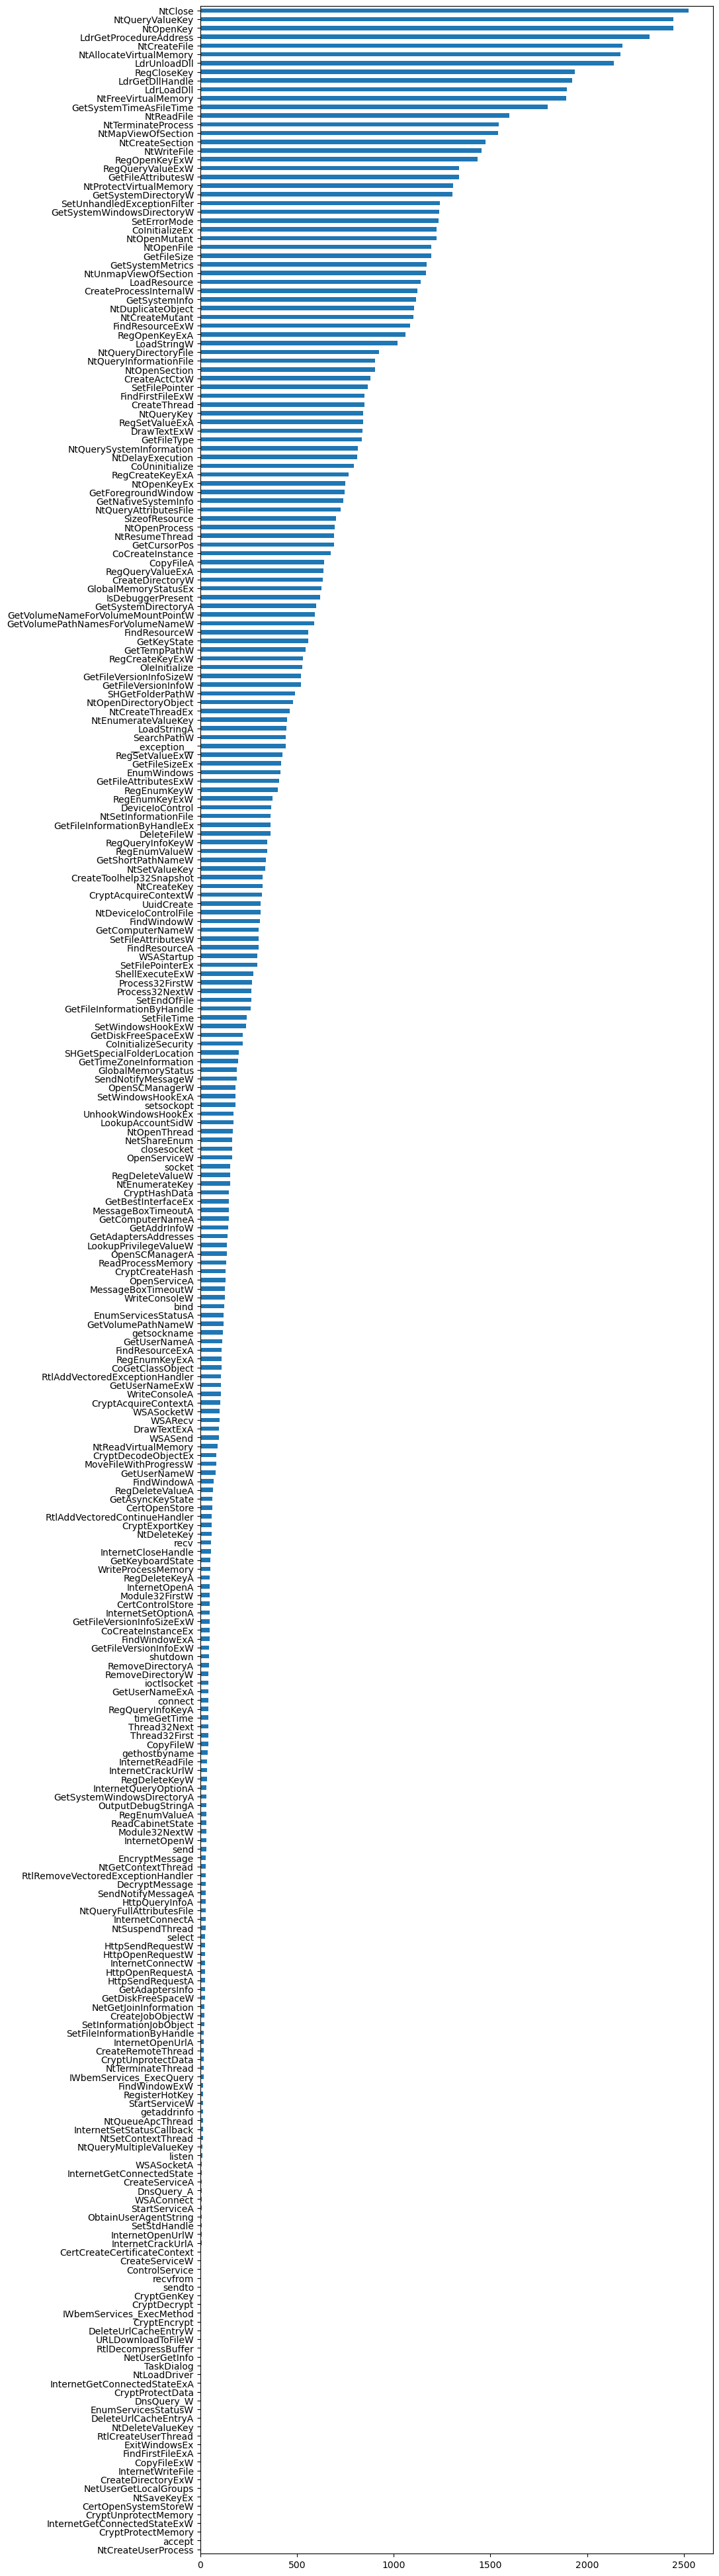

In [10]:
api_frequency = pd.DataFrame(combined_summary)[0].value_counts(ascending=True)
api_frequency.drop(' ', inplace=True)
api_frequency.plot(kind='barh', figsize=(10,50))
print(api_frequency.to_string(), file=open('./Frequency/MalbehavD_Freq.txt', mode='w'))

## 3.2. Oliveira Dataset

### 3.2.1. Examining Raw Dataset

In [11]:
og_oliveira.head()

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1


In [12]:
og_oliveira = None

In [13]:
#Expected API calls as per https://ieee-dataport.org/open-access/malware-analysis-datasets-api-call-sequences
oli_apis = ['NtOpenThread', 'ExitWindowsEx', 'FindResourceW', 'CryptExportKey', 'CreateRemoteThreadEx', 'MessageBoxTimeoutW', 'InternetCrackUrlW', 'StartServiceW', 'GetFileSize', 'GetVolumeNameForVolumeMountPointW', 'GetFileInformationByHandle', 'CryptAcquireContextW', 'RtlDecompressBuffer', 'SetWindowsHookExA', 'RegSetValueExW', 'LookupAccountSidW', 'SetUnhandledExceptionFilter', 'InternetConnectA', 'GetComputerNameW', 'RegEnumValueA', 'NtOpenFile', 'NtSaveKeyEx', 'HttpOpenRequestA', 'recv', 'GetFileSizeEx', 'LoadStringW', 'SetInformationJobObject', 'WSAConnect', 'CryptDecrypt', 'GetTimeZoneInformation', 'InternetOpenW', 'CoInitializeEx', 'CryptGenKey', 'GetAsyncKeyState', 'NtQueryInformationFile', 'GetSystemMetrics', 'NtDeleteValueKey', 'NtOpenKeyEx', 'sendto', 'IsDebuggerPresent', 'RegQueryInfoKeyW', 'NetShareEnum', 'InternetOpenUrlW', 'WSASocketA', 'CopyFileExW', 'connect', 'ShellExecuteExW', 'SearchPathW', 'GetUserNameA', 'InternetOpenUrlA', 'LdrUnloadDll', 'EnumServicesStatusW', 'EnumServicesStatusA', 'WSASend', 'CopyFileW', 'NtDeleteFile', 'CreateActCtxW', 'timeGetTime', 'MessageBoxTimeoutA', 'CreateServiceA', 'FindResourceExW', 'WSAAccept', 'InternetConnectW', 'HttpSendRequestA', 'GetVolumePathNameW', 'RegCloseKey', 'InternetGetConnectedStateExW', 'GetAdaptersInfo', 'shutdown', 'NtQueryMultipleValueKey', 'NtQueryKey', 'GetSystemWindowsDirectoryW', 'GlobalMemoryStatusEx', 'GetFileAttributesExW', 'OpenServiceW', 'getsockname', 'LoadStringA', 'UnhookWindowsHookEx', 'NtCreateUserProcess', 'Process32NextW', 'CreateThread', 'LoadResource', 'GetSystemTimeAsFileTime', 'SetStdHandle', 'CoCreateInstanceEx', 'GetSystemDirectoryA', 'NtCreateMutant', 'RegCreateKeyExW', 'IWbemServices_ExecQuery', 'NtDuplicateObject', 'Thread32First', 'OpenSCManagerW', 'CreateServiceW', 'GetFileType', 'MoveFileWithProgressW', 'NtDeviceIoControlFile', 'GetFileInformationByHandleEx', 'CopyFileA', 'NtLoadKey', 'GetNativeSystemInfo', 'NtOpenProcess', 'CryptUnprotectMemory', 'InternetWriteFile', 'ReadProcessMemory', 'gethostbyname', 'WSASendTo', 'NtOpenSection', 'listen', 'WSAStartup', 'socket', 'OleInitialize', 'FindResourceA', 'RegOpenKeyExA', 'RegEnumKeyExA', 'NtQueryDirectoryFile', 'CertOpenSystemStoreW', 'ControlService', 'LdrGetProcedureAddress', 'GlobalMemoryStatus', 'NtSetInformationFile', 'OutputDebugStringA', 'GetAdaptersAddresses', 'CoInitializeSecurity', 'RegQueryValueExA', 'NtQueryFullAttributesFile', 'DeviceIoControl', '__anomaly__', 'DeleteFileW', 'GetShortPathNameW', 'NtGetContextThread', 'GetKeyboardState', 'RemoveDirectoryA', 'InternetSetStatusCallback', 'NtResumeThread', 'SetFileInformationByHandle', 'NtCreateSection', 'NtQueueApcThread', 'accept', 'DecryptMessage', 'GetUserNameExW', 'SizeofResource', 'RegQueryValueExW', 'SetWindowsHookExW', 'HttpOpenRequestW', 'CreateDirectoryW', 'InternetOpenA', 'GetFileVersionInfoExW', 'FindWindowA', 'closesocket', 'RtlAddVectoredExceptionHandler', 'IWbemServices_ExecMethod', 'GetDiskFreeSpaceExW', 'TaskDialog', 'WriteConsoleW', 'CryptEncrypt', 'WSARecvFrom', 'NtOpenMutant', 'CoGetClassObject', 'NtQueryValueKey', 'NtDelayExecution', 'select', 'HttpQueryInfoA', 'GetVolumePathNamesForVolumeNameW', 'RegDeleteValueW', 'InternetCrackUrlA', 'OpenServiceA', 'InternetSetOptionA', 'CreateDirectoryExW', 'bind', 'NtShutdownSystem', 'DeleteUrlCacheEntryA', 'NtMapViewOfSection', 'LdrGetDllHandle', 'NtCreateKey', 'GetKeyState', 'CreateRemoteThread', 'NtEnumerateValueKey', 'SetFileAttributesW', 'NtUnmapViewOfSection', 'RegDeleteValueA', 'CreateJobObjectW', 'send', 'NtDeleteKey', 'SetEndOfFile', 'GetUserNameExA', 'GetComputerNameA', 'URLDownloadToFileW', 'NtFreeVirtualMemory', 'recvfrom', 'NtUnloadDriver', 'NtTerminateThread', 'CryptUnprotectData', 'NtCreateThreadEx', 'DeleteService', 'GetFileAttributesW', 'GetFileVersionInfoSizeExW', 'OpenSCManagerA', 'WriteProcessMemory', 'GetSystemInfo', 'SetFilePointer', 'Module32FirstW', 'ioctlsocket', 'RegEnumKeyW', 'RtlCompressBuffer', 'SendNotifyMessageW', 'GetAddrInfoW', 'CryptProtectData', 'Thread32Next', 'NtAllocateVirtualMemory', 'RegEnumKeyExW', 'RegSetValueExA', 'DrawTextExA', 'CreateToolhelp32Snapshot', 'FindWindowW', 'CoUninitialize', 'NtClose', 'WSARecv', 'CertOpenStore', 'InternetGetConnectedState', 'RtlAddVectoredContinueHandler', 'RegDeleteKeyW', 'SHGetSpecialFolderLocation', 'CreateProcessInternalW', 'NtCreateDirectoryObject', 'EnumWindows', 'DrawTextExW', 'RegEnumValueW', 'SendNotifyMessageA', 'NtProtectVirtualMemory', 'NetUserGetLocalGroups', 'GetUserNameW', 'WSASocketW', 'getaddrinfo', 'AssignProcessToJobObject', 'SetFileTime', 'WriteConsoleA', 'CryptDecodeObjectEx', 'EncryptMessage', 'system', 'NtSetContextThread', 'LdrLoadDll', 'InternetGetConnectedStateExA', 'RtlCreateUserThread', 'GetCursorPos', 'Module32NextW', 'RegCreateKeyExA', 'NtLoadDriver', 'NetUserGetInfo', 'SHGetFolderPathW', 'GetBestInterfaceEx', 'CertControlStore', 'StartServiceA', 'NtWriteFile', 'Process32FirstW', 'NtReadVirtualMemory', 'GetDiskFreeSpaceW', 'GetFileVersionInfoW', 'FindFirstFileExW', 'FindWindowExW', 'GetSystemWindowsDirectoryA', 'RegOpenKeyExW', 'CoCreateInstance', 'NtQuerySystemInformation', 'LookupPrivilegeValueW', 'NtReadFile', 'ReadCabinetState', 'GetForegroundWindow', 'InternetCloseHandle', 'FindWindowExA', 'ObtainUserAgentString', 'CryptCreateHash', 'GetTempPathW', 'CryptProtectMemory', 'NetGetJoinInformation', 'NtOpenKey', 'GetSystemDirectoryW', 'DnsQuery_A', 'RegQueryInfoKeyA', 'NtEnumerateKey', 'RegisterHotKey', 'RemoveDirectoryW', 'FindFirstFileExA', 'CertOpenSystemStoreA', 'NtTerminateProcess', 'NtSetValueKey', 'CryptAcquireContextA', 'SetErrorMode', 'UuidCreate', 'RtlRemoveVectoredExceptionHandler', 'RegDeleteKeyA', 'setsockopt', 'FindResourceExA', 'NtSuspendThread', 'GetFileVersionInfoSizeW', 'NtOpenDirectoryObject', 'InternetQueryOptionA', 'InternetReadFile', 'NtCreateFile', 'NtQueryAttributesFile', 'HttpSendRequestW', 'CryptHashMessage', 'CryptHashData', 'NtWriteVirtualMemory', 'SetFilePointerEx', 'CertCreateCertificateContext', 'DeleteUrlCacheEntryW', '__exception__']
oli_apis.sort()
print("# of Expected API Calls", len(oli_apis))

# of Expected API Calls 307


### 3.2.2.1 Pre-Cleaning Dataset (with duplicates; Original)

*Note that unlike Catak, Oliveira dataset is not too consecutive in terms of API call order.*

In [14]:
#CONVERTS THE NUMBER NOTATION OF API CALLS IN OLVIEIRA (2019) DATASET TO ACTUAL API CALLS
def get_header(col_size):
    header = ""
    header = "hash,malware," #'hash' is possibly MD5 as per Cyberchef 
    for i in range(col_size-2):
        header += str(i)+","
    return header[0:len(header)-1]+"\n"
dataset = open("../../Datasets/Oliveira_2019/Original/dynamic_api_call_sequence_per_malware_100_0_306.csv", mode="r") #Change to: os.getcwd()+"\\Original\\"+"dynamic_api_call_sequence_per_malware_100_0_306.csv" for terminal use
new_dataset = open("./Cache/Oliveira_Pre-Cleaned_Dupl.csv", mode="w+") #Change to: Oliveira_Pre-Cleaned.csv for terminal use
depth = 0
breadth = 0
for r in dataset:
    depth += 1
    if len(r.split(',')) > breadth:
        breadth = len(r.split(','))
dataset.seek(0, 0)
ctr = 0

print(f"Converting #s to API Calls...")
print(f"Moving malware label header...")
first_row = True
for row_data in dataset:
    if first_row:
        new_dataset.write(get_header(breadth))
        first_row = False
    else:
        new_row = row_data.replace('\n','').split(',')
        api_sublist = new_row[1:len(new_row)-1] #Creates API calls sublist
        new_list = [new_row[0]] + [new_row[len(new_row)-1]] + api_sublist #Hash, Malware Label, API calls
        for col in range(2,len(new_list)):
            new_list[col] = oli_apis[int(new_list[col])]
        new_dataset.write(','.join(new_list)+"\n")
    ctr += 1
print("Flushing file...")
new_dataset.flush()
print("Closing file...")
new_dataset.close()
print("Pre-cleaning for Oliveira Completed!")
dataset = None
labels = None
new_dataset = None

#Rearranging Columns
oliveira_dupl = pd.read_csv("./Cache/Oliveira_Pre-Cleaned_Dupl.csv")
oliveira_dupl.dropna(axis=1, how='all', inplace=True)
oliveira_dupl.fillna(' ', inplace=True)
oliveira_dupl.to_csv('./Cleaned/Str/Oliveira_Str_Dupl.csv', index=False)
oliveira_dupl.head()

Converting #s to API Calls...
Moving malware label header...
Flushing file...
Closing file...
Pre-cleaning for Oliveira Completed!


,hash,malware,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,071e8c3f8922e186e57548cd4c703a5d,1,HttpSendRequestA,WSAAccept,NtCreateSection,Process32NextW,WSAAccept,NtCreateSection,Process32NextW,recvfrom,...,InternetConnectA,GetComputerNameW,recv,LdrGetProcedureAddress,NtLoadDriver,Process32NextW,CryptHashData,OleInitialize,FindFirstFileExW,GetComputerNameW
1,33f8e6d08a6aae939f25a8e0d63dd523,1,GetFileVersionInfoExW,OleInitialize,NtQueryKey,OleInitialize,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,...,FindResourceW,GetFileType,RemoveDirectoryW,InternetConnectA,GetComputerNameW,recv,LdrGetProcedureAddress,NtLoadDriver,Process32NextW,CryptHashData
2,b68abd064e975e1c6d5f25e748663076,1,CreateActCtxW,HttpOpenRequestW,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,...,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestA,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestA,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestW,HttpSendRequestA
3,72049be7bd30ea61297ea624ae198067,1,GetFileVersionInfoExW,OleInitialize,NtQueryKey,OleInitialize,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,...,Process32NextW,OleInitialize,setsockopt,OleInitialize,setsockopt,NtQueryKey,OleInitialize,setsockopt,RegEnumValueA,setsockopt
4,c9b3700a77facf29172f32df6bc77f48,1,GetFileVersionInfoExW,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,...,CryptUnprotectMemory,OpenSCManagerA,SetStdHandle,CryptUnprotectMemory,OpenSCManagerA,SetStdHandle,LookupAccountSidW,SetStdHandle,LookupAccountSidW,SetStdHandle


### 3.2.2.2 Pre-Cleaning Dataset (without duplicates; MalbehavD-V1 like)

In [15]:
#CONVERTS THE NUMBER NOTATION OF API CALLS IN OLVIEIRA (2019) DATASET TO ACTUAL API CALLS
def get_header(col_size):
    header = ""
    header = "hash,malware," #'hash' is possibly MD5 as per Cyberchef 
    for i in range(col_size-2):
        header += str(i)+","
    return header[0:len(header)-1]+"\n"
dataset = open("../../Datasets/Oliveira_2019/Original/dynamic_api_call_sequence_per_malware_100_0_306.csv", mode="r") #Change to: os.getcwd()+"\\Original\\"+"dynamic_api_call_sequence_per_malware_100_0_306.csv" for terminal use
new_dataset = open("./Cache/Oliveira_Pre-Cleaned.csv", mode="w+") #Change to: Oliveira_Pre-Cleaned.csv for terminal use
depth = 0
breadth = 0
for r in dataset:
    depth += 1
    if len(r.split(',')) > breadth:
        breadth = len(r.split(','))
dataset.seek(0, 0)
ctr = 0

print(f"Converting #s to API Calls...")
print(f"Moving malware label header...")
first_row = True
for row_data in dataset:
    if first_row:
        new_dataset.write(get_header(breadth))
        first_row = False
    else:
        new_row = row_data.replace('\n','').split(',')
        api_sublist = list(dict.fromkeys(new_row[1:len(new_row)-1])) #Removes repeated API calls per sample
        new_list = [new_row[0]] + [new_row[len(new_row)-1]] + api_sublist #Hash, Malware Label, API calls
        for col in range(2,len(new_list)):
            new_list[col] = oli_apis[int(new_list[col])]
        new_dataset.write(','.join(new_list)+"\n")
    ctr += 1
print("Flushing file...")
new_dataset.flush()
print("Closing file...")
new_dataset.close()
print("Pre-cleaning for Oliveira Completed!")
dataset = None
labels = None
new_dataset = None

#Rearranging Columns
oliveira = pd.read_csv("./Cache/Oliveira_Pre-Cleaned.csv")
oliveira.dropna(axis=1, how='all', inplace=True)
oliveira.fillna(' ', inplace=True)
oliveira.to_csv('./Cleaned/Str/Oliveira_Str.csv', index=False)
oliveira.head()

Converting #s to API Calls...
Moving malware label header...
Flushing file...
Closing file...
Pre-cleaning for Oliveira Completed!


C:\Users\ejose\AppData\Local\Temp\ipykernel_15260\2087871671.py:44: DtypeWarning: Columns (45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  oliveira = pd.read_csv("./Cache/Oliveira_Pre-Cleaned.csv")


,hash,malware,0,1,2,3,4,5,6,7,...,35,36,37,38,39,40,41,42,43,44
0,071e8c3f8922e186e57548cd4c703a5d,1,HttpSendRequestA,WSAAccept,NtCreateSection,Process32NextW,recvfrom,GetFileAttributesW,OleInitialize,NtLoadKey,...,,,,,,,,,,
1,33f8e6d08a6aae939f25a8e0d63dd523,1,GetFileVersionInfoExW,OleInitialize,NtQueryKey,NtLoadKey,InternetConnectA,CreateActCtxW,recv,CoGetClassObject,...,,,,,,,,,,
2,b68abd064e975e1c6d5f25e748663076,1,CreateActCtxW,HttpOpenRequestW,RemoveDirectoryW,InternetConnectA,NtLoadKey,GetTimeZoneInformation,SetStdHandle,LookupAccountSidW,...,,,,,,,,,,
3,72049be7bd30ea61297ea624ae198067,1,GetFileVersionInfoExW,OleInitialize,NtQueryKey,NtLoadKey,InternetConnectA,CreateActCtxW,RemoveDirectoryW,RegEnumValueA,...,,,,,,,,,,
4,c9b3700a77facf29172f32df6bc77f48,1,GetFileVersionInfoExW,RemoveDirectoryW,InternetConnectA,NtLoadKey,CreateActCtxW,CoUninitialize,WSAAccept,NtCreateSection,...,,,,,,,,,,


### 3.2.3. Examining API calls

#### 3.2.3.1. Oliveira with duplicates

**3.2.3.1.1. Examining API calls in Oliveira (with duplicates)**

In [16]:
featr = oliveira_dupl.iloc[:,2:]
featr.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,HttpSendRequestA,WSAAccept,NtCreateSection,Process32NextW,WSAAccept,NtCreateSection,Process32NextW,recvfrom,GetFileAttributesW,OleInitialize,...,InternetConnectA,GetComputerNameW,recv,LdrGetProcedureAddress,NtLoadDriver,Process32NextW,CryptHashData,OleInitialize,FindFirstFileExW,GetComputerNameW
1,GetFileVersionInfoExW,OleInitialize,NtQueryKey,OleInitialize,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,...,FindResourceW,GetFileType,RemoveDirectoryW,InternetConnectA,GetComputerNameW,recv,LdrGetProcedureAddress,NtLoadDriver,Process32NextW,CryptHashData
2,CreateActCtxW,HttpOpenRequestW,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,...,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestA,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestA,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestW,HttpSendRequestA
3,GetFileVersionInfoExW,OleInitialize,NtQueryKey,OleInitialize,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,...,Process32NextW,OleInitialize,setsockopt,OleInitialize,setsockopt,NtQueryKey,OleInitialize,setsockopt,RegEnumValueA,setsockopt
4,GetFileVersionInfoExW,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,NtLoadKey,...,CryptUnprotectMemory,OpenSCManagerA,SetStdHandle,CryptUnprotectMemory,OpenSCManagerA,SetStdHandle,LookupAccountSidW,SetStdHandle,LookupAccountSidW,SetStdHandle


**3.2.3.1.2. Unique API calls on Oliveira (with duplicates)**

In [17]:
featr = oliveira_dupl.iloc[:, 2:]
combined_summary = []
featr['summary'] = featr.values.tolist()
for i in range(featr['summary'].shape[0]):
    length = len(featr['summary'].loc[i])
    for j in range(length-1):
        combined_summary.append(featr['summary'].loc[i][j])
oli_featr = pd.Series(combined_summary).dropna().drop_duplicates().reset_index()
oli_featr.rename(columns={'index': 'index', 0: 'api_calls'}, inplace=True)
oli_featr.sort_values(inplace=True, by='api_calls')
oli_featr.drop(axis=1, labels="index", inplace=True)
oli_featr = oli_featr[oli_featr.api_calls != ' ']

#Writing to own file
f = open("./Features/Oliveira_Dupl_Features_.txt", mode="w")
f.write(str(oli_featr['api_calls'].tolist()).replace('[','').replace(']','').replace(',','\n').replace('\'','').replace(' ',''))
f.flush()
f.close()

oli_featr.head()

,api_calls
157,AssignProcessToJobObject
57,CertCreateCertificateContext
225,CertOpenStore
176,CertOpenSystemStoreW
205,CoCreateInstance


**3.2.3.1.3. Frequency of API calls in the Dataset (with duplicates)**

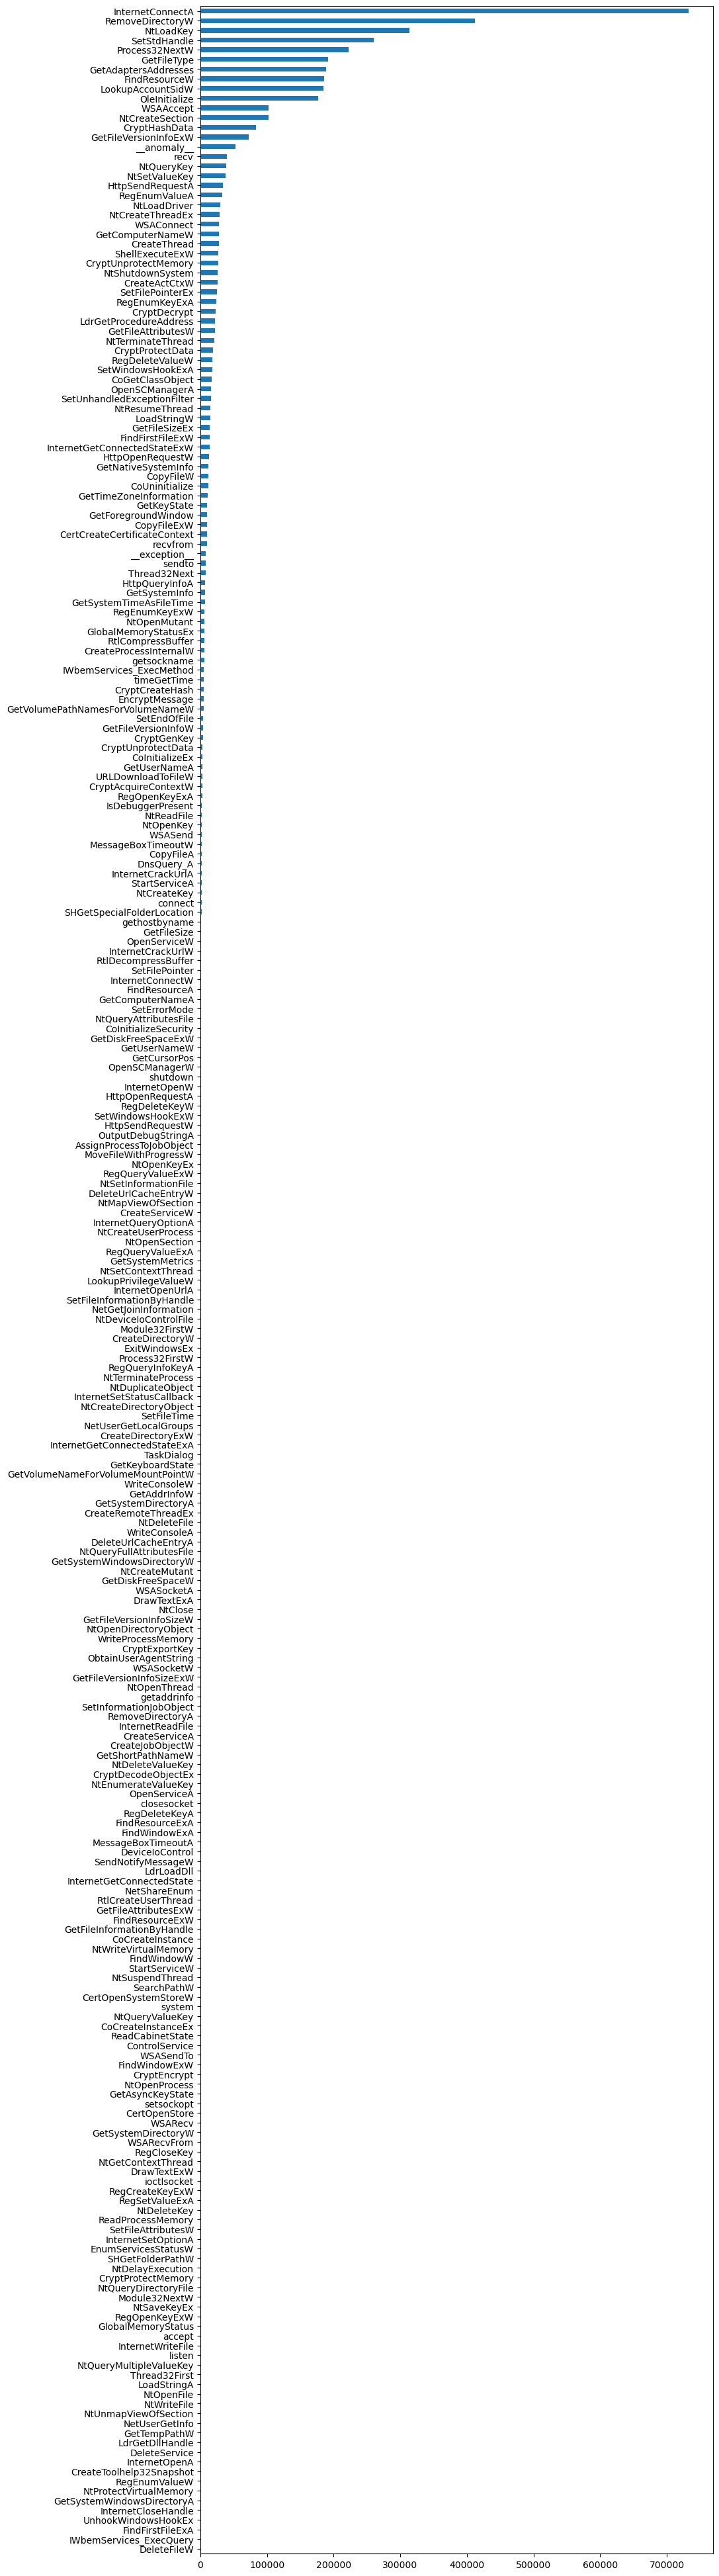

In [18]:
api_frequency = pd.DataFrame(combined_summary)[0].value_counts(ascending=True)
#api_frequency.drop(' ', inplace=True)
api_frequency.plot(kind='barh', figsize=(10,50))
print(api_frequency.to_string(), file=open('./Frequency/Olivieira_Dupl_Freq.txt', mode='w'))

#### 3.2.3.2. Oliveira without duplicates

**3.2.3.2.1. Examining API calls in Oliveira (without duplicates)**

In [19]:
featr = oliveira.iloc[:,2:]
featr.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,HttpSendRequestA,WSAAccept,NtCreateSection,Process32NextW,recvfrom,GetFileAttributesW,OleInitialize,NtLoadKey,InternetConnectA,CryptHashData,...,,,,,,,,,,
1,GetFileVersionInfoExW,OleInitialize,NtQueryKey,NtLoadKey,InternetConnectA,CreateActCtxW,recv,CoGetClassObject,NtShutdownSystem,ShellExecuteExW,...,,,,,,,,,,
2,CreateActCtxW,HttpOpenRequestW,RemoveDirectoryW,InternetConnectA,NtLoadKey,GetTimeZoneInformation,SetStdHandle,LookupAccountSidW,GetAdaptersAddresses,SetWindowsHookExW,...,,,,,,,,,,
3,GetFileVersionInfoExW,OleInitialize,NtQueryKey,NtLoadKey,InternetConnectA,CreateActCtxW,RemoveDirectoryW,RegEnumValueA,NtSetValueKey,GetForegroundWindow,...,,,,,,,,,,
4,GetFileVersionInfoExW,RemoveDirectoryW,InternetConnectA,NtLoadKey,CreateActCtxW,CoUninitialize,WSAAccept,NtCreateSection,Process32NextW,Thread32Next,...,,,,,,,,,,


**3.2.3.2.2. Unique API calls on Oliveira (without duplicates)**

In [20]:
featr = oliveira.iloc[:, 2:]
combined_summary = []
featr['summary'] = featr.values.tolist()
for i in range(featr['summary'].shape[0]):
    length = len(featr['summary'].loc[i])
    for j in range(length-1):
        combined_summary.append(featr['summary'].loc[i][j])
oli_featr = pd.Series(combined_summary).dropna().drop_duplicates().reset_index()
oli_featr.rename(columns={'index': 'index', 0: 'api_calls'}, inplace=True)
oli_featr.sort_values(inplace=True, by='api_calls')
oli_featr.drop(axis=1, labels="index", inplace=True)
oli_featr = oli_featr[oli_featr.api_calls != ' ']

#Writing to own file
f = open("./Features/Oliveira_Features.txt", mode="w")
f.write(str(oli_featr['api_calls'].tolist()).replace('[','').replace(']','').replace(',','\n').replace('\'','').replace(' ',''))
f.flush()
f.close()

oli_featr.head()

,api_calls
158,AssignProcessToJobObject
58,CertCreateCertificateContext
227,CertOpenStore
177,CertOpenSystemStoreW
206,CoCreateInstance


**3.2.3.2.3. Frequency of API calls in the Dataset (without duplicates)**

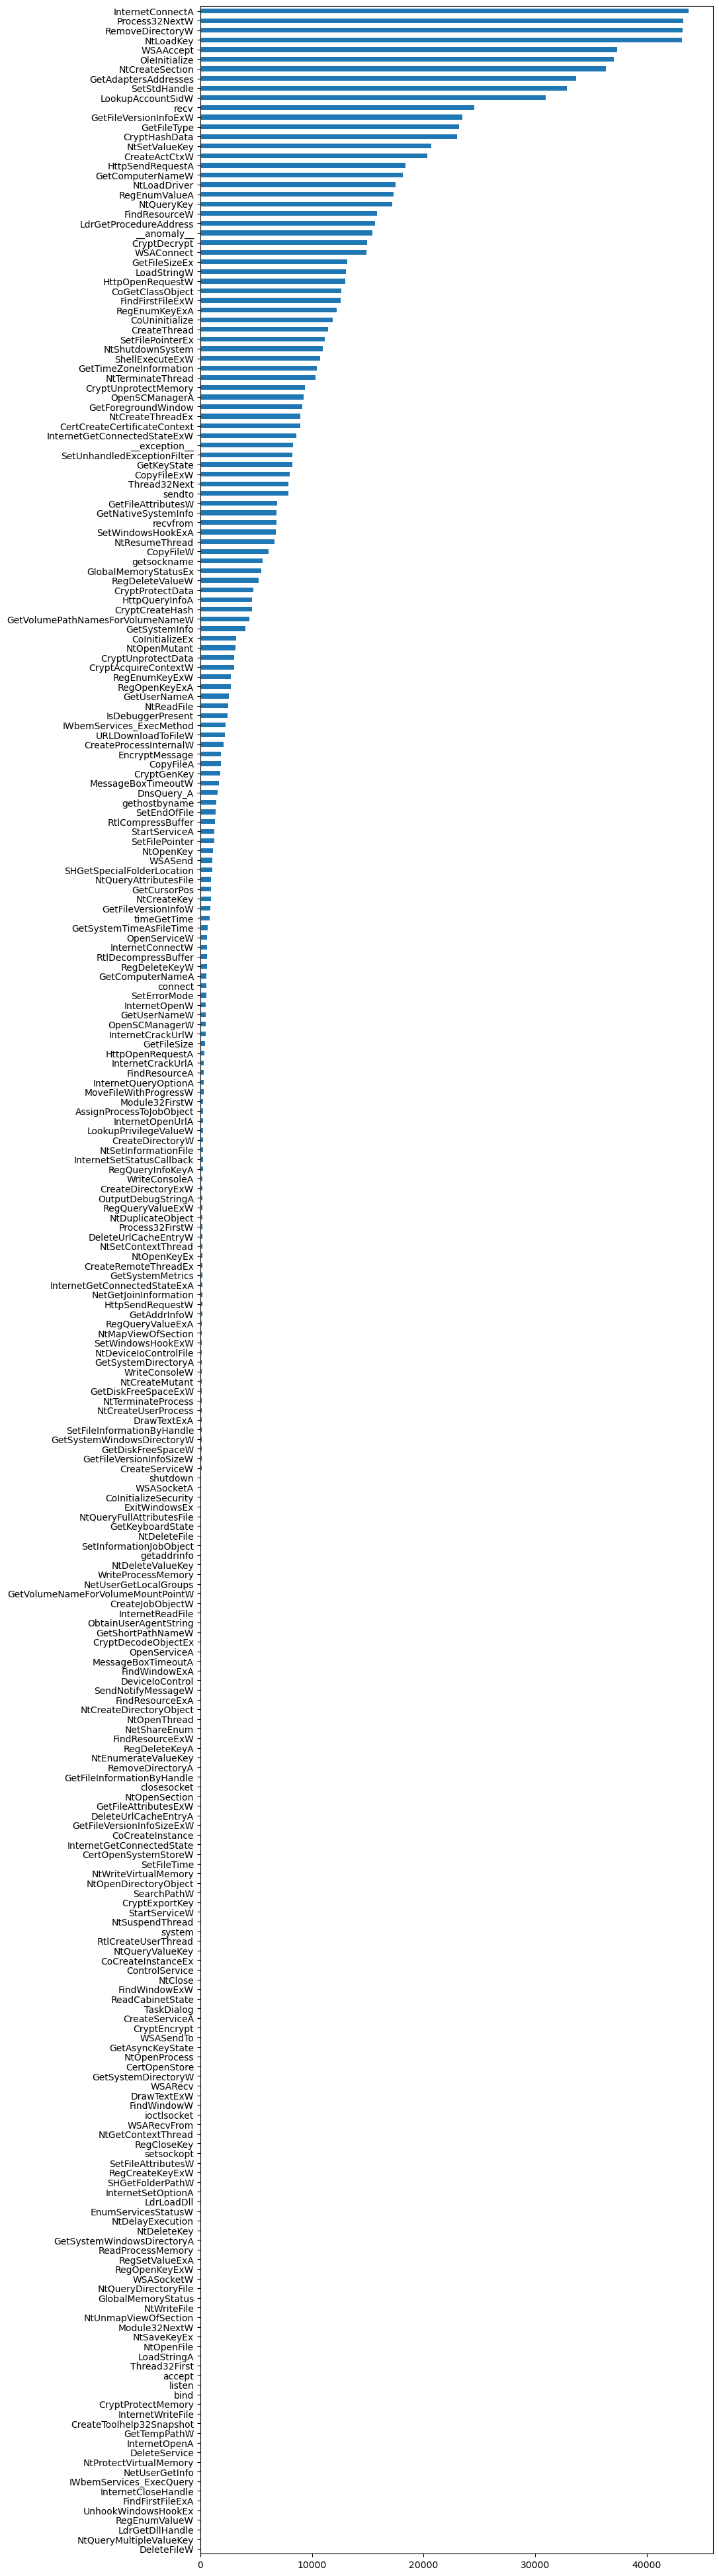

In [21]:
api_frequency = pd.DataFrame(combined_summary)[0].value_counts(ascending=True)
api_frequency.drop(' ', inplace=True)
api_frequency.plot(kind='barh', figsize=(10,50))
print(api_frequency.to_string(), file=open('./Frequency/Olivieira_Freq.txt', mode='w'))

## 3.3. Catak (2021)

### 3.3.1. Examining Raw Dataset

In [22]:
og_catak.head()

ldrloaddll ldrgetprocedureaddress ldrloaddll ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrloaddll ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrloaddll ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrloaddll ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrloaddll ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrloaddll ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrloaddll ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrloaddll ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrloaddll ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrloaddll ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrloaddll ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrg

In [23]:
og_catak = None

### 3.3.2. Pre-Cleaning Dataset

In [24]:
import threading
LABELS = []
API_CALLS = []
def read_api(dataset):
    global API_CALLS
    print("Running [read_api] thread...")
    for row in dataset:
        API_CALLS.append(row.replace("\n","").split(","))
    print("Finishing [read_api] thread...")
def read_labels(dataset_label):
    global LABELS
    print("Running [read_labels] thread...")
    for row in dataset_label:
        LABELS.append(row.replace("\n",""))
    print("Finishing [read_labels] thread...")
dataset = open("../../Datasets/Catak_etal_2021/all_analysis_data.csv", mode='r') #Change to: os.getcwd()+"\\Original\\"+"all_analysis_data.csv" for terminal use
dataset_label = open("../../Datasets/Catak_etal_2021/labels.csv", mode='r') #Change to: os.getcwd()+"\\Original\\"+"labels.csv" for terminal use
new_dataset = open("./Cache/Catak_Pre-Cleaned.csv", mode="w") #Change to: Catak_Pre-Cleaned.csv for terminal use
api_t = threading.Thread(target=read_api, args=[dataset])
label_t = threading.Thread(target=read_labels, args=[dataset_label])
api_t.start()
label_t.start()
api_t.join()
label_t.join()
print("API Calls:", len(API_CALLS))
print("Labels Size:", len(LABELS))

#Checking for unique API calls not found on MalbehavD and Olivieira reference APIs
ref_apis = oli_apis
ref_apis = malbd_featr['api_calls'].tolist()
ref_apis = list(dict.fromkeys(oli_apis))
ref_apis.sort()
ref_apis_lower = []
for o in ref_apis:
    ref_apis_lower.append(o.lower())
unique = []
for i in range(len(LABELS)):
    sub = [LABELS[i]]
    apis = API_CALLS[i]
    for a in range(len(apis)): 
        apis[a] = apis[a].replace("\n","").split(" ")
        apis[a] = list(dict.fromkeys(apis[a]))
        for s in range(len(apis[a])):
            if apis[a][s] not in ref_apis_lower and apis[a][s] not in unique:
                unique.append(apis[a][s])
                print("Unique:", apis[a][s])
print("Catak-only APIs:", unique)
print("API Calls:", len(API_CALLS),"+",len(unique))

Running [read_api] thread...
Running [read_labels] thread...
Finishing [read_labels] thread...
Finishing [read_api] thread...
API Calls: 7107
Labels Size: 7107
Unique: rtldecompressfragment
Unique: wnetgetprovidernamew
Catak-only APIs: ['rtldecompressfragment', 'wnetgetprovidernamew']
API Calls: 7107 + 2


**These Catak-only APIs shall be added to the reference used for pre-cleaning Catak.**

In [25]:
unique = ['RtlDecompressFragment', 'WNetGetProviderNameW']
ref_apis += unique
ref_apis_lower = []
for o in ref_apis:
    ref_apis_lower.append(o.lower())

In [26]:
sub = None
apis = None

#CONVERTS THE CASING OF THE API CALLS IN CATAK (2021) DATASET TO THE SAME CASING AS FOUND IN OLIVEIRA (2019) AND 
#REMOVES THE DUPLICATE API CALLS

print("API Calls:", len(API_CALLS))
print("Labels Size:", len(LABELS))
combined = []
print("Converting casing...")
for i in range(0,len(LABELS)):
    sub = [LABELS[i]]
    apis = API_CALLS[i][0]
    for a in range(len(apis)):
        apis[a] = apis[a].replace("\n","").split(" ")
        apis[a] = list(dict.fromkeys(apis[a]))
        for s in range(len(apis[a])):
            for o in range(len(ref_apis_lower)):
                if apis[a][s] in ref_apis_lower[o]:
                    sub.append(ref_apis[o])
    combined.append(sub)
print("Casing Converted")
print("Finding size of pre-cleaned dataset...")
breadth = 0
depth = len(combined)
for c in combined:
    if len(c)-1 > breadth:
        breadth = len(c)-1
print("Depth:", depth)
print("Breadth:", breadth)
header = "malware_type,malware,"
for i in range(0,breadth):
    header += str(i)
    if i < breadth-1:
        header += ","
header += "\n"
print("Writing to file...")
new_dataset.write(header)
for c in range(0,len(combined)):
    combined[c].insert(1,'1')
    new_dataset.write(','.join(combined[c])+"\n")
print("Flushing file...")
new_dataset.flush()
print("Closing file...")
new_dataset.close()
print("Pre-cleaning for Catak Completed!")
dataset = None
labels = None
new_dataset = None

catak = pd.read_csv("./Cache/Catak_Pre-Cleaned.csv", low_memory=False)
catak.fillna(' ', inplace=True)
catak.to_csv('./Cleaned/Str/Catak_Str.csv', index=False)
catak.head()

API Calls: 7107
Labels Size: 7107
Converting casing...
Casing Converted
Finding size of pre-cleaned dataset...
Depth: 7107
Breadth: 166
Writing to file...
Flushing file...
Closing file...
Pre-cleaning for Catak Completed!


,malware_type,malware,0,1,2,3,4,5,6,7,...,156,157,158,159,160,161,162,163,164,165
0,Trojan,1,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExA,NtOpenKey,NtOpenKeyEx,NtQueryValueKey,NtClose,NtQueryAttributesFile,...,,,,,,,,,,
1,Trojan,1,GetSystemTimeAsFileTime,NtAllocateVirtualMemory,NtFreeVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,SetUnhandledExceptionFilter,NtCreateMutant,NtClose,...,,,,,,,,,,
2,Backdoor,1,LdrGetDllHandle,LdrGetProcedureAddress,GetSystemDirectoryA,CopyFileA,RegOpenKeyExA,RegSetValueExA,RegCloseKey,RegCreateKeyExA,...,,,,,,,,,,
3,Backdoor,1,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExA,NtOpenKey,NtOpenKeyEx,NtQueryValueKey,NtClose,NtQueryAttributesFile,...,,,,,,,,,,
4,Trojan,1,LdrLoadDll,LdrGetProcedureAddress,WSAStartup,NtCreateMutant,RegOpenKeyExA,RegDeleteKeyA,RegCloseKey,CopyFileA,...,,,,,,,,,,


### 3.3.3. Examining API calls

**3.3.3.1. Examining API calls of Catak**

In [27]:
featr = catak.iloc[:,2:]
featr.head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExA,NtOpenKey,NtOpenKeyEx,NtQueryValueKey,NtClose,NtQueryAttributesFile,LoadStringA,NtAllocateVirtualMemory,...,,,,,,,,,,
1,GetSystemTimeAsFileTime,NtAllocateVirtualMemory,NtFreeVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,SetUnhandledExceptionFilter,NtCreateMutant,NtClose,LdrLoadDll,GetSystemInfo,...,,,,,,,,,,
2,LdrGetDllHandle,LdrGetProcedureAddress,GetSystemDirectoryA,CopyFileA,RegOpenKeyExA,RegSetValueExA,RegCloseKey,RegCreateKeyExA,NtCreateFile,SetFilePointer,...,,,,,,,,,,
3,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExA,NtOpenKey,NtOpenKeyEx,NtQueryValueKey,NtClose,NtQueryAttributesFile,LoadStringA,NtAllocateVirtualMemory,...,,,,,,,,,,
4,LdrLoadDll,LdrGetProcedureAddress,WSAStartup,NtCreateMutant,RegOpenKeyExA,RegDeleteKeyA,RegCloseKey,CopyFileA,RegSetValueExA,NtCreateFile,...,,,,,,,,,,


**3.3.3.2. Unique API calls on Catak**

In [28]:
combined_summary = []
featr['summary'] = featr.values.tolist()
for i in range(featr['summary'].shape[0]):
    length = len(featr['summary'].loc[i])
    for j in range(length-1):
        combined_summary.append(featr['summary'].loc[i][j])

catak_featr = pd.Series(combined_summary).dropna().drop_duplicates().reset_index()
catak_featr.rename(columns={'index': 'index', 0: 'api_calls'}, inplace=True)
catak_featr.sort_values(inplace=True, by='api_calls')
catak_featr.drop(axis=1, labels="index", inplace=True)
catak_featr = catak_featr[catak_featr.api_calls != ' ']

#Writing to own file
f = open("./Features/Catak_Features.txt", mode="w")
f.write(str(catak_featr['api_calls'].tolist()).replace('[','').replace(']','').replace(',','\n').replace('\'','').replace(' ',''))
f.flush()
f.close()

catak_featr.head()

,api_calls
185,CertOpenSystemStoreA
116,CoCreateInstance
117,CoCreateInstanceEx
150,CoGetClassObject
28,CoInitializeEx


**3.3.3.3. Frequency of API calls in the Dataset**

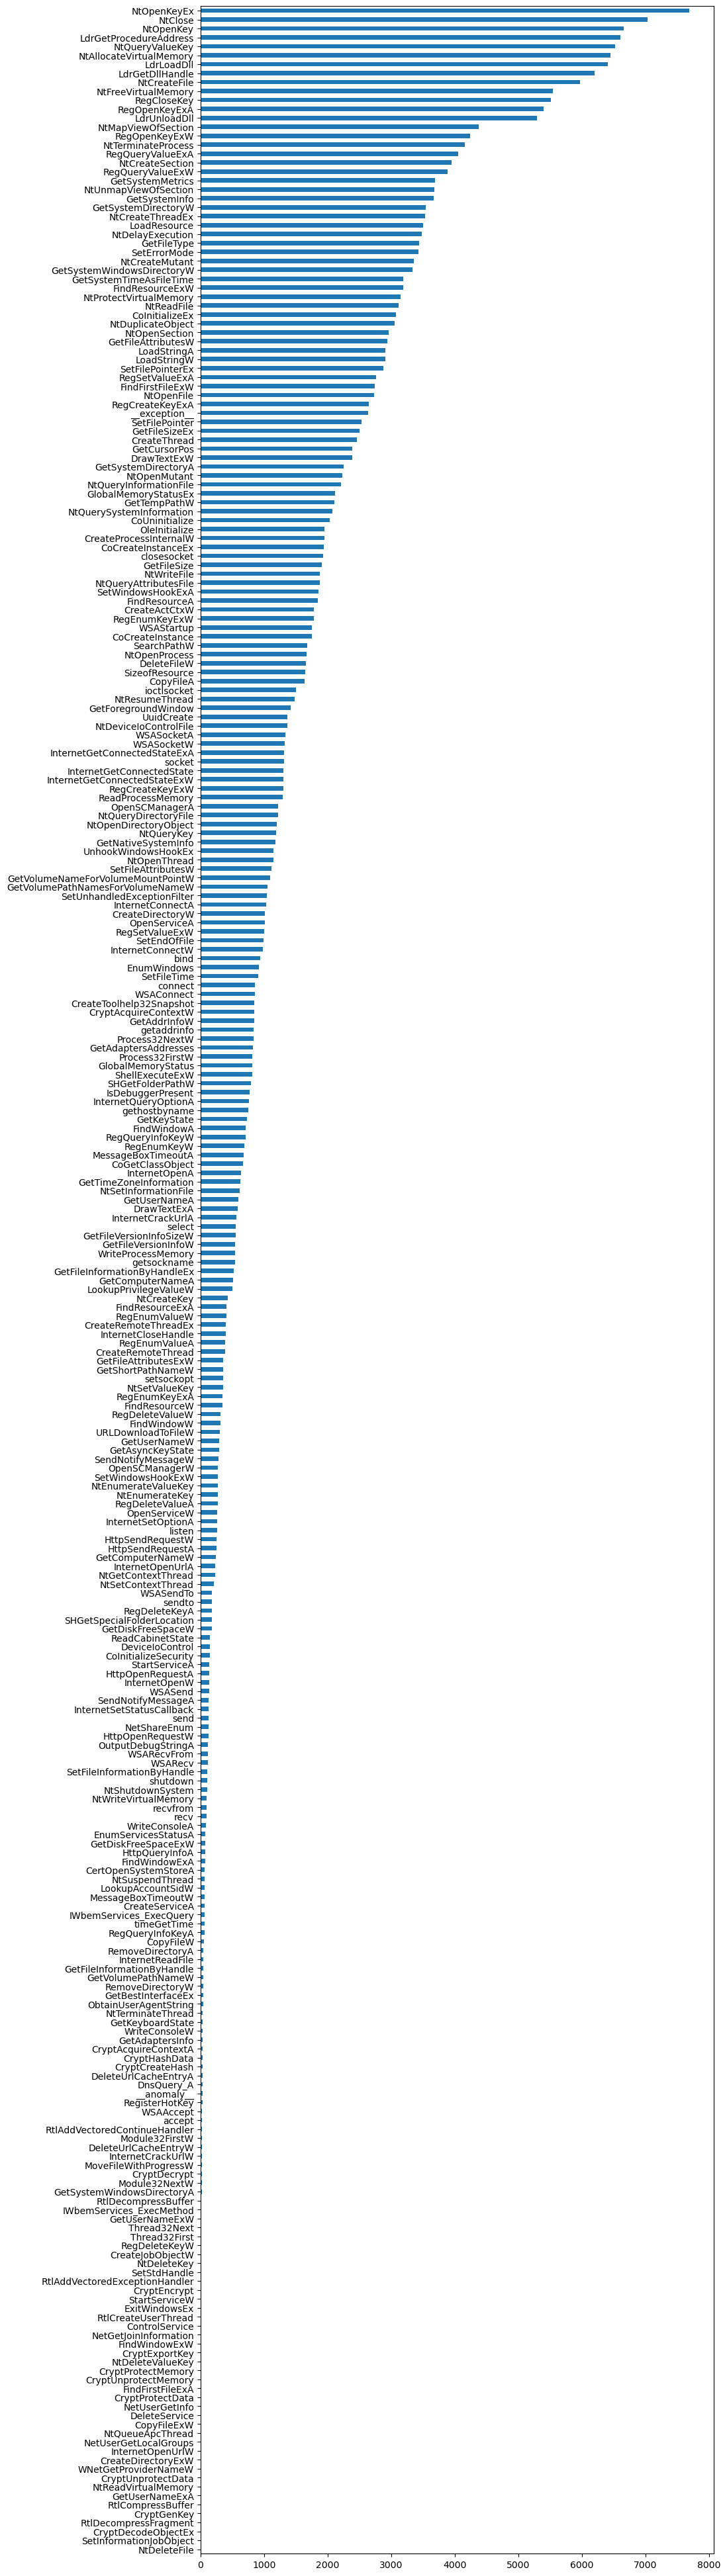

In [29]:
api_frequency = pd.DataFrame(combined_summary)[0].value_counts(ascending=True)
api_frequency.drop(' ', inplace=True)
api_frequency.plot(kind='barh', figsize=(10,50))
print(api_frequency.to_string(), file=open('./Frequency/Catak_Freq.txt', mode='w'))

# 4. Comparing MalbehavD-V1 to Oliveira and Catak Datasets

## 4.1. Finding API call similarity in MalbehavD-V1 from Oliveira and Catak Datasets

Determining the similarities of MalbehavD-V1 to its counterparts, Oliveira and Catak.

In [30]:
def find_match(src:list, other:list):
    score = 0
    for m in src:
        if m in other:
            score += 1
    return 100*(score/len(src))

oli_apis = oli_featr['api_calls'].tolist()
catak_apis = catak_featr['api_calls'].tolist()
malbd_apis = malbd_featr['api_calls'].tolist()
malbd_oli_catak_featr = {'malbehavd_api':malbd_featr['api_calls'].tolist(), 
                         'match_to_oliveira': malbd_featr['api_calls'].isin(oli_apis).tolist(),
                         'match_to_catak': malbd_featr['api_calls'].isin(catak_apis).tolist()}
malbd_oli_catak_featr = pd.DataFrame(data=malbd_oli_catak_featr)
malbd_oli_catak_featr.to_csv("./Matching/MalbehavD_Match.csv", index=False)
print(f"MalbehavD-V1 to Oliveira Match Rate: {find_match(malbd_apis, oli_apis):.4f}%")
print(f"MalbehavD-V1 to Catak Match Rate: {find_match(malbd_apis, catak_apis):.4f}%")
malbd_oli_catak_featr

MalbehavD-V1 to Oliveira Match Rate: 85.9107%
MalbehavD-V1 to Catak Match Rate: 93.4708%


,malbehavd_api,match_to_oliveira,match_to_catak
0,CertControlStore,False,False
1,CertCreateCertificateContext,True,False
2,CertOpenStore,True,False
3,CertOpenSystemStoreW,True,False
4,CoCreateInstance,True,True
...,...,...,...
286,sendto,True,True
287,setsockopt,True,True
288,shutdown,True,True
289,socket,False,True


**Conclusion:**

The nearest alternative dataset to MalbehavD-V1 is Catak with a match rate of 93.47% (i.e., similarity of APIs found between the datasets).

## 4.2. Finding API call similarity of each dataset (MalbehavD-V1, Oliveira, & Catak) to all combined unique API calls.

Combining all unique APIs on all dataset and determinining how much of these API calls are found in a specified dataset.

In [31]:
def find_true_rate(exists:list):
    count = 0
    for e in exists:
        if str(e) == "True":
            count += 1
    return 100*(count/len(exists))
all_apis = malbd_apis + oli_apis + catak_apis
all_apis = list(dict.fromkeys(all_apis))
results = []
for api in all_apis:
    results.append(api+","+str(api in malbd_apis)+","+str(api in oli_apis)+","+str(api in catak_apis))
receipt = open("./Features/CombinedAPIs.csv", mode="w")
receipt.write("api,inMalbehavD,inOliveira,inCatak"+"\n")
for r in results:
    receipt.write(r+"\n")
receipt.flush()
receipt.close()
combined_apis = pd.read_csv("./Features/CombinedAPIs.csv")
print(f"Combined APIs in MalbehavD: {find_true_rate(combined_apis['inMalbehavD'].tolist()):.2f}%")
print(f"Combined APIs in Oliviera: {find_true_rate(combined_apis['inOliveira'].tolist()):.2f}%")
print(f"Combined APIs in Catak: {find_true_rate(combined_apis['inCatak'].tolist()):.2f}%")
combined_apis

Combined APIs in MalbehavD: 94.48%
Combined APIs in Oliviera: 85.71%
Combined APIs in Catak: 92.53%


,api,inMalbehavD,inOliveira,inCatak
0,CertControlStore,True,False,False
1,CertCreateCertificateContext,True,True,False
2,CertOpenStore,True,True,False
3,CertOpenSystemStoreW,True,True,False
4,CoCreateInstance,True,True,True
...,...,...,...,...
303,__anomaly__,False,True,True
304,system,False,True,False
305,CertOpenSystemStoreA,False,False,True
306,RtlDecompressFragment,False,False,True


**Conclusion:**

It can be assumed then that **MalbehavD does indeed have the most number of unique APIs** that is found across all three datasets. Hence, it is rightful that it will be the selected dataset as the training dataset while the rest will only be suitable for use as test datasets (especially in the context of reliability).

However, due to the problem at hand being an ML problem, there might be still advantages on utilizing Oliveira instead of MalbehavD due to the prior's advantage in terms of quantity despite being marginally lower in terms of quality. This assumption however can only be seen once there is a pre-testing of the dataset on a set of test ML models.

**Update (Sept. 19, 2023):**

After some re-exploration of the dataset, it was revealed that **Oliveira does have duplicate API calls per sample** albeit in a mostly non-consecutive fashion. This is discovery was overseen on the initial version of the this notebook. 

This suggests that the earlier version of this notebook and the ML Test notebook (dated Aug. 2023) may have been partially wrong especially in the context of Model Robustness testing as the datasets are not exactly the same in terms of feature design. This also means that the Oliveira dataset will have an additional cleaning step (i.e., **removal of duplicate feature values**) from this notebook's original version to make it as similar as MalbehavD-V1 which is already been implemented to produce separate outputs from this notebook (implemented as of Sept. 19, 2023). Designated as (`oliveira_dupl`, `**_Dupl**`) and non_duplicate Oliveira.

However, further investigation on the matter suggests that all initial conclusions made in this notebook still hold the same as the point of contention in between MalbehavD-V1 and Oliveira is only the number of unique API calls and not the total no. of API calls found within the dataset.

# 5. Trimming and Maximization

## 5.1. Identifying Min & Max Feature Size/Breadth

In [32]:
#Note: The -2 is for the first two columns which are non-API related (i.e., label)
datasets = [malbehavd, oliveira, oliveira_dupl, catak]
dataset_label = ["MalbehavD", "Oliveira", "Oliveira with Duplicate", "Catak"]
lowest = 1000
highest = 0
for d in range(len(datasets)):
    print(f"{dataset_label[d]} Features (APIs only): {datasets[d].shape[1]-2}")
    if datasets[d].shape[1]-2 > highest:
        highest = datasets[d].shape[1]-2
    if datasets[d].shape[1]-2 < lowest:
        lowest = datasets[d].shape[1]-2
print("")
print(f"Set Highest Feature Size: {highest}")
print(f"Set Lowest Feature Size: {lowest}")

MalbehavD Features (APIs only): 175
Oliveira Features (APIs only): 45
Oliveira with Duplicate Features (APIs only): 100
Catak Features (APIs only): 166

Set Highest Feature Size: 175
Set Lowest Feature Size: 45


## 5.2. Maximizing Features/Breadth

Maximizing no. features to the dataset with lowest feature set count (only APIs) to avoid error:

`The feature names should match those that were passed during fit. Feature names seen at fit time, yet now missing`

This error only occurs whenever the fitted features of the training data is more than the features of the test data which can occur during Model Robustness Testing.

Reference max no. of features will be from MalbehavD with 175 API calls.

### 5.2.1.1 Shaping Oliveira (with duplicates) to same breadth as MalbehavD

In [33]:
#Building missing columns for Oliveira
depth = oliveira.shape[0]
breadth = oliveira.shape[1]-2
missing_header = []
for i in range(0, highest-oliveira.shape[1]+2):
    missing_header.append(breadth+i)
extension_oli = pd.DataFrame(' ', index = np.arange(depth), columns = missing_header)
oliveira_max = oliveira.join(extension_oli)

### 5.2.1.2. Shaping Oliveira (without duplicates) to same breadth as MalbehavD

In [34]:
#Building missing columns for Oliveira
depth = oliveira_dupl.shape[0]
breadth = oliveira_dupl.shape[1]-2
missing_header = []
for i in range(0, highest-oliveira_dupl.shape[1]+2):
    missing_header.append(breadth+i)
extension_oli = pd.DataFrame(' ', index = np.arange(depth), columns = missing_header)
oliveira_max_dupl = oliveira_dupl.join(extension_oli)

### 5.2.2 Shaping Catak to same breadth as MalbehavD

In [35]:
#Building missing columns for Oliveira
depth = catak.shape[0]
breadth = catak.shape[1]-2
missing_header = []
for i in range(0, highest-catak.shape[1]+2):
    missing_header.append(breadth+i)
extension_catak = pd.DataFrame(' ', index = np.arange(depth), columns = missing_header)
catak_max = catak.join(extension_catak)

## 5.3. Trimming Features/Breadth

Trimming no. features to the dataset with lowest feature set count (only APIs) to avoid error:

`The feature names should match those that were passed during fit.`

This error only occurs whenever the fitted features of the training data is  less than the features of the test data which can occur during Model Robustness Testing.

Reference max no. of features will be from Oliveira with 100 API calls.

### 5.3.1 Dropping excess from MalbehavD

In [36]:
malbehavd_dropped = malbehavd.drop(malbehavd.columns[lowest-1+3:],axis=1,inplace=False)
malbehavd_dropped.head()

,sha256,malware,0,1,2,3,4,5,6,7,...,35,36,37,38,39,40,41,42,43,44
0,5c18291c481a192ed5003084dab2d8a117fd3736359218...,0,LdrUnloadDll,CoUninitialize,NtQueryKey,NtDuplicateObject,GetShortPathNameW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,...,SetUnhandledExceptionFilter,NtCreateFile,NtCreateThreadEx,GetSystemTimeAsFileTime,GlobalMemoryStatusEx,NtCreateMutant,NtProtectVirtualMemory,GetFileAttributesExW,RegEnumValueW,NtCreateSection
1,4683faf3da550ffb594cf5513c4cbb34f64df85f27fd1c...,0,NtOpenMutant,GetForegroundWindow,NtQueryKey,DrawTextExW,NtSetInformationFile,RegQueryValueExA,LdrGetProcedureAddress,CoUninitialize,...,LdrGetDllHandle,NtCreateSection,SetUnhandledExceptionFilter,NtOpenKey,CoInitializeEx,LoadResource,FindResourceExW,NtAllocateVirtualMemory,NtOpenKeyEx,LdrLoadDll
2,9a0aea1c7290031d7c3429d0e921f107282cc6eab854ee...,0,GetForegroundWindow,DrawTextExW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtQueryValueKey,RegCloseKey,GetFileAttributesW,...,,,,,,,,,,
3,e0f3e4d5f50afd9c31e51dd9941c5a52d57c7c524f5d11...,0,NtQueryValueKey,LdrUnloadDll,GlobalMemoryStatus,WriteConsoleA,NtOpenKey,LdrGetProcedureAddress,NtTerminateProcess,NtClose,...,,,,,,,,,,
4,ec2b6d29992f13e74015ff0b129150b4afae15c593e4b7...,0,LdrUnloadDll,GetSystemTimeAsFileTime,NtOpenKey,WSAStartup,SetUnhandledExceptionFilter,NtTerminateProcess,NtClose,NtAllocateVirtualMemory,...,,,,,,,,,,


### 5.3.2 Dropping excess from Catak

In [37]:
catak_dropped = catak.drop(catak.columns[lowest-1+3:],axis=1)
catak_dropped.head()

,malware_type,malware,0,1,2,3,4,5,6,7,...,35,36,37,38,39,40,41,42,43,44
0,Trojan,1,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExA,NtOpenKey,NtOpenKeyEx,NtQueryValueKey,NtClose,NtQueryAttributesFile,...,,,,,,,,,,
1,Trojan,1,GetSystemTimeAsFileTime,NtAllocateVirtualMemory,NtFreeVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,SetUnhandledExceptionFilter,NtCreateMutant,NtClose,...,,,,,,,,,,
2,Backdoor,1,LdrGetDllHandle,LdrGetProcedureAddress,GetSystemDirectoryA,CopyFileA,RegOpenKeyExA,RegSetValueExA,RegCloseKey,RegCreateKeyExA,...,,,,,,,,,,
3,Backdoor,1,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExA,NtOpenKey,NtOpenKeyEx,NtQueryValueKey,NtClose,NtQueryAttributesFile,...,GetKeyState,,,,,,,,,
4,Trojan,1,LdrLoadDll,LdrGetProcedureAddress,WSAStartup,NtCreateMutant,RegOpenKeyExA,RegDeleteKeyA,RegCloseKey,CopyFileA,...,,,,,,,,,,


# 6. Converting string API calls to int equivalent

The technique to be used here will be [**LabelEncoder**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

Basically what it does it converts string API calls to numeric equivalent.

This however means that the deployed model will require on the 'transformed' values as per the APIs listed in the `./Features/CombinedAPIs.csv` with an included `NaN` value (substituted as ' ') which is referred to in the notebook as `apis`.

## 6.1 Getting Reference APIs

For use later when transforming data from string APIs to numeric form to be compatible for use in ML training.

In [38]:
def getAPIs():
    apis = pd.read_csv('./Features/CombinedAPIs.csv', low_memory=False)
    apis = apis['api'].to_list()
    return apis
apis = getAPIs()
apis

['CertControlStore',
 'CertCreateCertificateContext',
 'CertOpenStore',
 'CertOpenSystemStoreW',
 'CoCreateInstance',
 'CoCreateInstanceEx',
 'CoGetClassObject',
 'CoInitializeEx',
 'CoInitializeSecurity',
 'CoUninitialize',
 'ControlService',
 'CopyFileA',
 'CopyFileExW',
 'CopyFileW',
 'CreateActCtxW',
 'CreateDirectoryExW',
 'CreateDirectoryW',
 'CreateJobObjectW',
 'CreateProcessInternalW',
 'CreateRemoteThread',
 'CreateServiceA',
 'CreateServiceW',
 'CreateThread',
 'CreateToolhelp32Snapshot',
 'CryptAcquireContextA',
 'CryptAcquireContextW',
 'CryptCreateHash',
 'CryptDecodeObjectEx',
 'CryptDecrypt',
 'CryptEncrypt',
 'CryptExportKey',
 'CryptGenKey',
 'CryptHashData',
 'CryptProtectData',
 'CryptProtectMemory',
 'CryptUnprotectData',
 'CryptUnprotectMemory',
 'DecryptMessage',
 'DeleteFileW',
 'DeleteUrlCacheEntryA',
 'DeleteUrlCacheEntryW',
 'DeviceIoControl',
 'DnsQuery_A',
 'DnsQuery_W',
 'DrawTextExA',
 'DrawTextExW',
 'EncryptMessage',
 'EnumServicesStatusA',
 'EnumServic

## 6.2. LabelEncoding

In [39]:
le = preprocessing.LabelEncoder()
le.fit(apis)

#Assumes apis and le exists and that le has been fitted
def label_encoder(df, output_filename):
    global le
    if le == None:
        le = preprocessing.LabelEncoder()
        le.fit
    df_feats = df.iloc[:, 2:].apply(le.fit_transform)
    df.drop(df.columns[2:], axis=1, inplace=True)#
    df = df.join(df_feats)
    df.to_csv(output_filename, index=False)
    return df

### 6.2.1.1 Standard Files

In [40]:
malbehavd_enc = pd.read_csv('./Cleaned/Str/MalbehavD_Str.csv', low_memory=False)
malbehavd_enc = label_encoder(malbehavd_enc, 'MalbehavD_LabelEncoded.csv')

catak_enc = pd.read_csv('./Cleaned/Str/Catak_Str.csv', low_memory=False)
catak_enc = label_encoder(catak_enc, 'Catak_LabelEncoded.csv')

oliveira_enc = pd.read_csv('./Cleaned/Str/Oliveira_Str.csv', low_memory=False)
oliveira_enc = label_encoder(oliveira_enc, 'Oliveira_LabelEncoded.csv')

oliveira_enc_dupl = pd.read_csv('./Cleaned/Str/Oliveira_Str_Dupl.csv', low_memory=False)
oliveira_enc_dupl = label_encoder(oliveira_enc, 'Oliveira_LabelEncoded_Dupl.csv')

### 6.2.2 Maximized Files

**Note:** This dataset may be 'noisy' as it contains repetitive NaN values at the end of each sample.

In [41]:
malbehavd.to_csv("./Cleaned/Max/MalbehavD_LabelEnc_Max.csv", index=False)
catak_max = label_encoder(catak_max, './Cleaned/Max/Catak_LabelEnc_Max.csv')
oliveira_max = label_encoder(oliveira_max, './Cleaned/Max/Oliveira_LabelEnc_Max.csv')
oliveira_max_dupl = label_encoder(oliveira_max_dupl, './Cleaned/Max/Oliveira_LabelEnc_Max.csv')

### 6.2.3 Trimmed Files

**Note:** This dataset may be 'incomplete' as it is had cut the excess API calls beyond 100 units (as per Oliveira's API call size).

In [42]:
oliveira.to_csv("./Cleaned/Trim/Oliveira_LabelEnc_Trim.csv", index=False)

malbehavd_dropped = label_encoder(malbehavd_dropped, './Cleaned/Trim/MalbehavD_LabelEnc_Trim.csv')
catak_dropped = label_encoder(catak_dropped, './Cleaned/Trim/Catak_LabelEnc_Trim.csv')

# 7. Time Taken

In [43]:
dur_s = time.time()-start_time
dur_min = dur_s/60
print(f"{dur_s}s")
print(f"{dur_min:.2f}mins")

413.5051760673523s
6.89mins
